# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Raffa Reyhan
- **Email:** raffareyhan7@gmail.com
- **ID Dicoding:** raffa_reyhan

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan performa penyewaan sepeda oleh perusahaan pada tahun 2011 dan 2012 ?
- Kapan jumlah penyewaan sepeda mencapai nilai tertinggi dan terendah jika diukur berdasarkan jam dan hari ?
- Bagaimana rata-rata persebaran pelanggan yang menyewa sepeda berdasarkan musim dan kondisi cuaca selama dua tahun tersebut ?

## Import Semua Packages/Library yang Digunakan

In [1]:
#!pip install streamlit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada day_df

#### Menilai data `hour_df`

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Sama seperti data `day_df`, jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

### Cleaning Data

#### Membersihkan data day_df

Karena terdapat kesalahan tipe data untuk kolom dteday. Yang mana kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object, maka kita perlu menggantinya.

In [13]:
datetime_columns = 'dteday'
day_df[datetime_columns] = pd.to_datetime(day_df[datetime_columns])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan data hour_df

Karena terdapat kesalahan tipe data untuk kolom dteday. Yang mana kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object, maka kita perlu menggantinya.

In [16]:
datetime_columns = 'dteday'
hour_df[datetime_columns] = pd.to_datetime(hour_df[datetime_columns])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore  `day_df`

In [19]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
446,447,2012-03-22,2,1,3,0,4,1,1,0.554167,0.531567,0.831250,0.117562,1334,5537,6871
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
276,277,2011-10-04,4,0,10,0,2,1,1,0.484167,0.472858,0.710000,0.205854,486,3970,4456
712,713,2012-12-13,4,1,12,0,4,1,1,0.295833,0.294188,0.485833,0.174129,425,5107,5532
115,116,2011-04-26,2,0,4,0,2,1,1,0.631667,0.594083,0.729167,0.326500,678,3722,4400


In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [21]:
# Statistik sepeda yang disewa berdasarkan bulan
day_mnth = pd.DataFrame(day_df.groupby(by="mnth").agg({"cnt":["sum", "mean", "min", "max", "std"]})).reset_index()
#hour_df.groupby(by="hr").agg({"cnt":["sum", "mean", "min", "max", "std"]})
day_mnth["mnth"] = day_mnth["mnth"].replace({1: 'January',
                                             2: 'February',
                                             3: 'March',
                                             4: 'April',
                                             5: 'May',
                                             6: 'June',
                                             7: 'July',
                                             8: 'August',
                                             9: 'September',
                                            10: 'October',
                                            11: 'November',
                                            12: 'December'})

#df1 = pd.DataFrame(day_mnth)
day_mnth

mnth     cnt                                      
                  sum         mean   min   max          std
0     January  134933  2176.338710   431  4521  1161.674370
1    February  151352  2655.298246  1005  5062  1145.313307
2       March  228920  3692.258065   605  8362  1899.301812
3       April  269094  4484.900000   795  7460  1776.160778
4         May  331686  5349.774194  2633  8294  1298.711561
5        June  346342  5772.366667  3767  8120  1240.400031
6        July  344948  5563.677419  3285  8173  1273.751871
7      August  351194  5664.419355  1115  7865  1494.516146
8   September  345991  5766.516667  1842  8714  1810.130649
9     October  322352  5199.225806    22  8156  1988.392517
10   November  254831  4247.183333  1495  6852  1285.712709
11   December  211036  3403.806452   441  6606  1549.639353

In [22]:
# Banyaknya sepeda yang disewa berdasarkan musim
day_season = pd.DataFrame(day_df.groupby(by="season").agg({"cnt":["sum", "mean", "min", "max", "std"]})).reset_index()
day_season["season"] = day_season["season"].replace({1: 'Winter',
                                             2: 'Spring',
                                             3: 'Summer',
                                             4: 'Fall'})
day_season

season      cnt                                      
               sum         mean   min   max          std
0  Winter   471348  2604.132597   431  7836  1399.942119
1  Spring   918589  4992.331522   795  8362  1695.977235
2  Summer  1061129  5644.303191  1115  8714  1459.800381
3    Fall   841613  4728.162921    22  8555  1699.615261

In [23]:
day_weekday = pd.DataFrame(day_df.groupby(by="weekday").agg({"cnt":["sum", "mean", "min", "max", "std"]})).reset_index()
day_weekday["weekday"] = day_weekday["weekday"].replace({0: 'Sunday',
                                             1: 'Monday',
                                             2: 'Tuesday',
                                             3: 'Wednesday',
                                             4: 'Thursday',
                                             5: 'Friday',
                                             6: 'Saturday'})
day_weekday

weekday     cnt                                      
                 sum         mean   min   max          std
0     Sunday  444027  4228.828571   605  8227  1872.496629
1     Monday  455503  4338.123810    22  7525  1793.074013
2    Tuesday  469109  4510.663462   683  7767  1826.911642
3  Wednesday  473048  4548.538462   441  8173  2038.095884
4   Thursday  485395  4667.259615   431  7804  1939.433317
5     Friday  487790  4690.288462  1167  8362  1874.624870
6   Saturday  477807  4550.542857   627  8714  2196.693009

In [24]:
day_weatsit = pd.DataFrame(day_df.groupby(by="weathersit").agg({"cnt":["sum", "mean", "min", "max", "std"]})).reset_index()
day_weatsit

weathersit      cnt                                     
                  sum         mean  min   max          std
0          1  2257952  4876.786177  431  8714  1879.483989
1          2   996858  4035.862348  605  8362  1809.109918
2          3    37869  1803.285714   22  4639  1240.284449

### Explore  `hour_df`

In [25]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11460,11461,2012-04-27,2,1,4,17,0,5,1,1,0.54,0.5152,0.24,0.3881,89,613,702
1751,1752,2011-03-18,1,0,3,16,0,5,1,1,0.68,0.6364,0.39,0.2836,67,137,204
5527,5528,2011-08-23,3,0,8,5,0,2,1,1,0.54,0.5152,0.56,0.1940,1,35,36
5718,5719,2011-08-31,3,0,8,17,0,3,1,1,0.72,0.6515,0.45,0.1343,83,525,608
2611,2612,2011-04-23,2,0,4,17,0,6,0,1,0.60,0.5909,0.73,0.3284,168,215,383


In [26]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [27]:
hour_df.groupby(by="hr").agg({"cnt":["sum", "mean", "min", "max", "std"]})

cnt                                 
       sum        mean min  max         std
hr                                         
0    39130   53.898072   2  283   42.307910
1    24164   33.375691   1  168   33.538727
2    16352   22.869930   1  132   26.578642
3     8174   11.727403   1   79   13.239190
4     4428    6.352941   1   28    4.143818
5    14261   19.889819   1   66   13.200765
6    55132   76.044138   1  213   55.084348
7   154171  212.064649   1  596  161.441936
8   261001  359.011004   5  839  235.189285
9   159438  219.309491  14  426   93.703458
10  126257  173.668501   8  539  102.205413
11  151320  208.143054  10  663  127.495536
12  184414  253.315934   3  776  145.081134
13  184919  253.661180  11  760  148.107657
14  175652  240.949246  12  750  147.271574
15  183149  251.233196   7  750  144.632541
16  227748  311.983562  11  783  148.682618
17  336860  461.452055  15  976  232.656611
18  309772  425.510989  23  977  224.639304
19  226789  311.523352  11  743  161.050359
20  164550  226.030220  11  567  119.670164
21  125445  172.314560   6  584   89.788893
22   95612  131.335165   9  502   69.937782
23   63941   87.831044   2  256   50.846889

In [28]:
hour_df.groupby(by="weathersit").agg({"cnt":['sum',"mean", "min", "max", "std"]})

cnt                                 
                sum        mean min  max         std
weathersit                                          
1           2338173  204.869272   1  977  189.487773
2            795952  175.165493   1  957  165.431589
3            158331  111.579281   1  891  133.781045
4               223   74.333333  23  164   77.925178

Perhatikan pada kolom weathersit, disitu tertulis dalam angka (int). Angka tersebut merepresentasikan masing-masing keadaan cuaca berikut ini:

1.  Clear, Few clouds, Partly cloudy
2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
4.  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog



In [29]:
#hour_df['hum'] = hour_df['hum'] * 100

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan performa penyewaan sepeda oleh perusahaan pada tahun 2011 dan 2012 ?

Pertama-tama ambil dataset pada tahun 2011

In [30]:
day_df1 = day_df.iloc[:365]
year2011_df = pd.DataFrame(day_df1.groupby("mnth").cnt.sum().reset_index())
year2011_df['mnth'] = year2011_df['mnth'].replace({1: 'January',
                                                   2: 'February',
                                                   3: 'March',
                                                   4: 'April',
                                                   5: 'May',
                                                   6: 'June',
                                                   7: 'July',
                                                   8: 'August',
                                                   9: 'September',
                                                   10: 'October',
                                                   11: 'November',
                                                   12: 'December'})
year2011_df

,mnth,cnt
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821
5,June,143512
6,July,141341
7,August,136691
8,September,127418
9,October,123511


Selanjutnya ambil dataset pada tahun 2012

In [31]:
day_df2 = day_df.iloc[365:]
year2012_df = pd.DataFrame(day_df2.groupby("mnth").cnt.sum().reset_index())
year2012_df['mnth'] = year2011_df['mnth'].replace({1: 'January',
                                                   2: 'February',
                                                   3: 'March',
                                                   4: 'April',
                                                   5: 'May',
                                                   6: 'June',
                                                   7: 'July',
                                                   8: 'August',
                                                   9: 'September',
                                                   10: 'October',
                                                   11: 'November',
                                                   12: 'December'})
year2012_df

,mnth,cnt
0,January,96744
1,February,103137
2,March,164875
3,April,174224
4,May,195865
5,June,202830
6,July,203607
7,August,214503
8,September,218573
9,October,198841


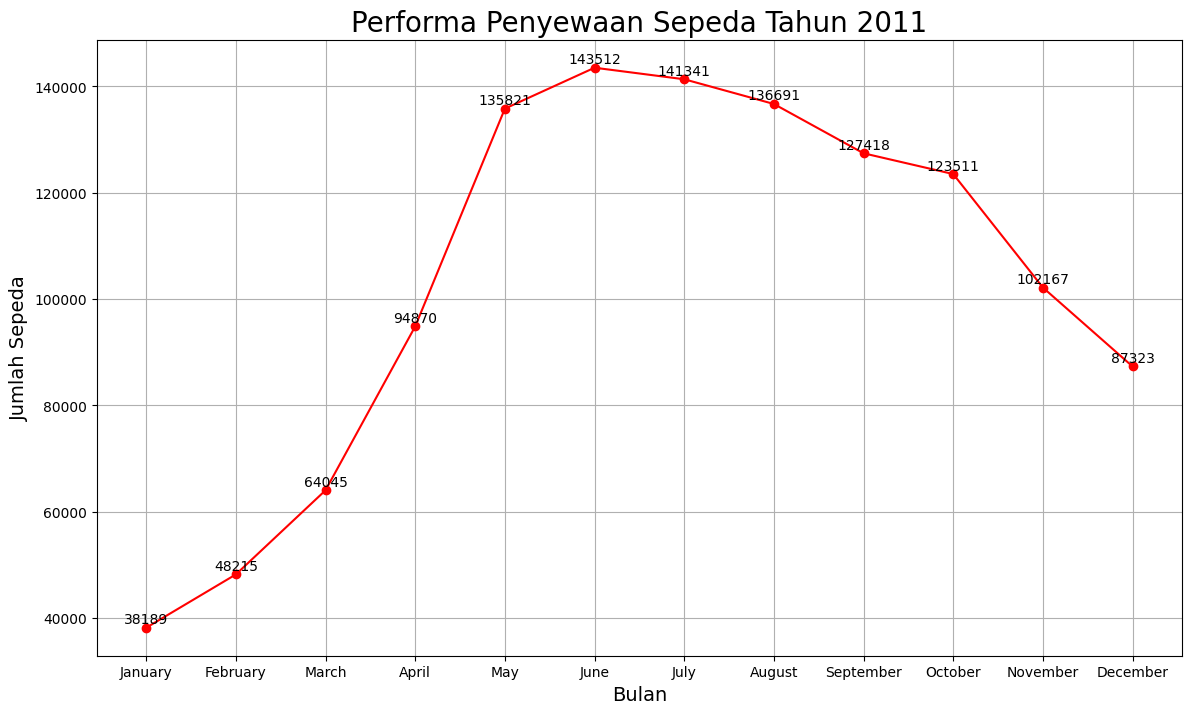

In [32]:
plt.figure(figsize=(14, 8))

# Plot the line with markers
plt.plot(year2011_df['mnth'], year2011_df['cnt'], label='2011', marker='o', color='red')

# Add annotations for each point
for x, y in zip(year2011_df['mnth'], year2011_df['cnt']):
    plt.text(x, y + 783, f"{y}", color='black', ha='center', fontsize=10)  # Adjust +50 for spacing above the point

# Set title and labels
plt.title('Performa Penyewaan Sepeda Tahun 2011', size=20)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Sepeda", fontsize=14)

plt.grid(True)  # Optional: Adds grid for better visualization
plt.show()

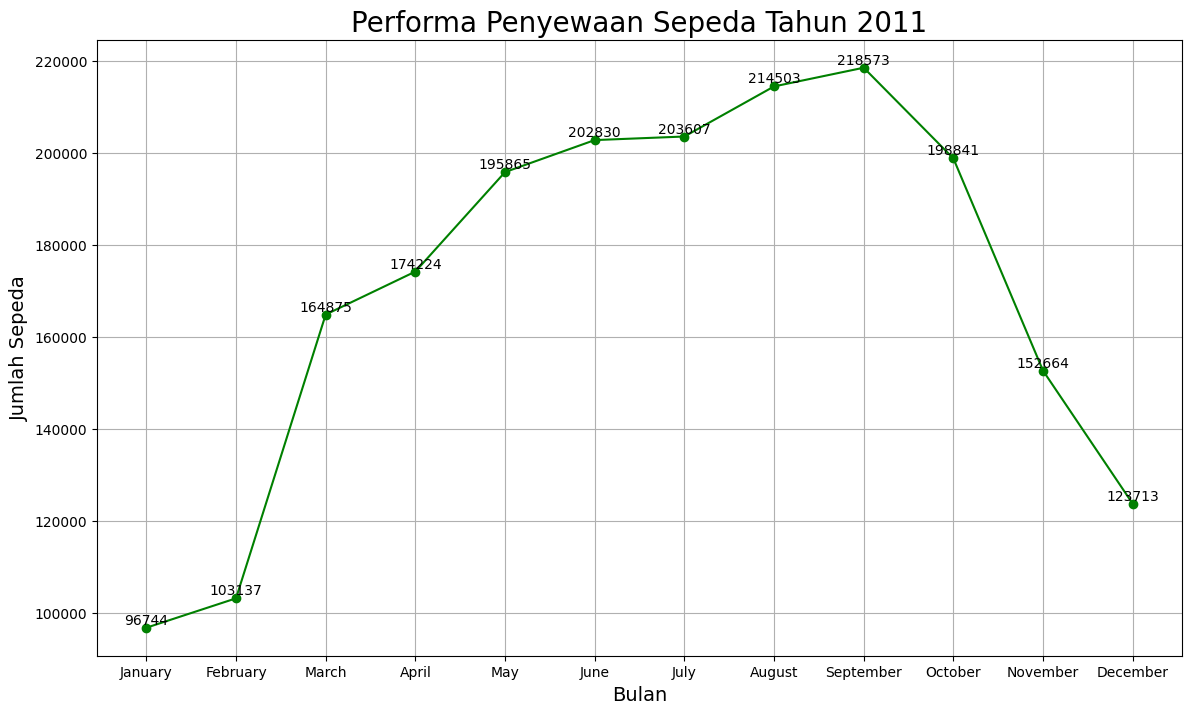

In [33]:
plt.figure(figsize=(14, 8))

# Plot the line with markers
plt.plot(year2012_df['mnth'], year2012_df['cnt'], label='2012', marker='o', color='green')

# Add annotations for each point
for x, y in zip(year2012_df['mnth'], year2012_df['cnt']):
    plt.text(x, y + 783, f"{y}", color='black', ha='center', fontsize=10)  # Adjust +50 for spacing above the point

# Set title and labels
plt.title('Performa Penyewaan Sepeda Tahun 2011', size=20)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Jumlah Sepeda", fontsize=14)

plt.grid(True)  # Optional: Adds grid for better visualization
plt.show()

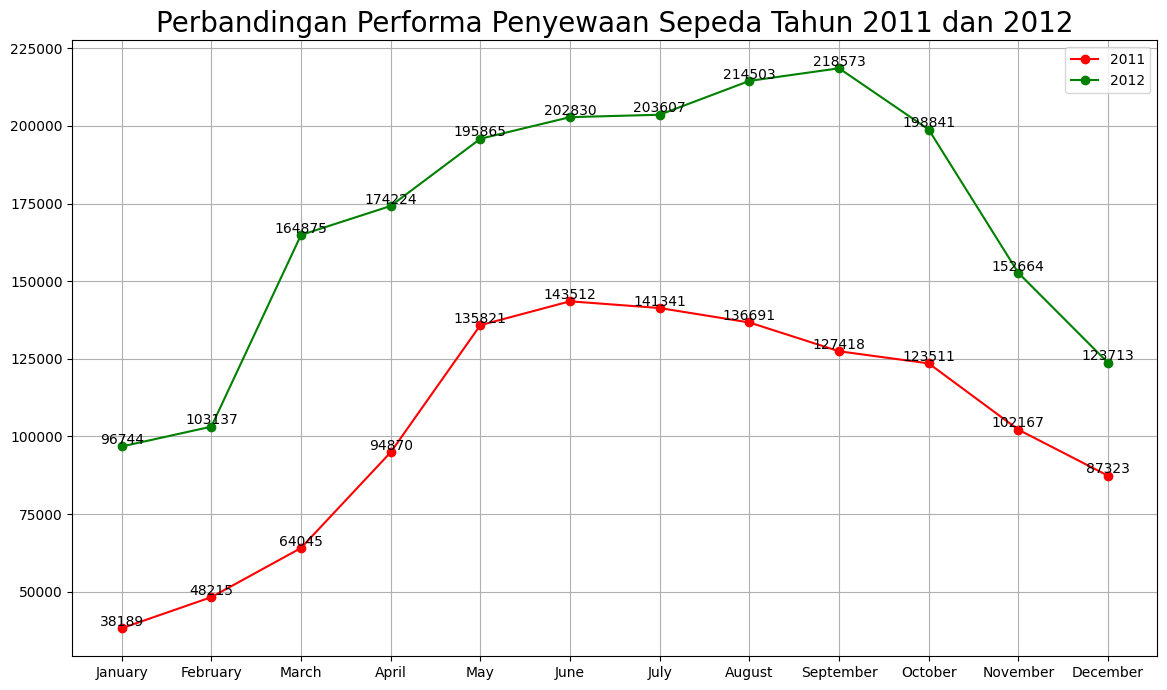

In [34]:
plt.figure(figsize=(14, 8))

# Plot the line with markers
plt.plot(year2011_df['mnth'], year2011_df['cnt'], label='2011', marker='o', color='red')

# Add annotations for each point
for x, y in zip(year2011_df['mnth'], year2011_df['cnt']):
    plt.text(x, y + 783, f"{y}", color='black', ha='center', fontsize=10)

# Plot the line with markers
plt.plot(year2012_df['mnth'], year2012_df['cnt'], label='2012', marker='o', color='green')

# Add annotations for each point
for x, y in zip(year2012_df['mnth'], year2012_df['cnt']):
    plt.text(x, y + 783, f"{y}", color='black', ha='center', fontsize=10)

plt.title('Perbandingan Performa Penyewaan Sepeda Tahun 2011 dan 2012', size=20)
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan gambar di atas, terlihat bahwa terdapat kenaikan yang signifikan dari bisnis penyewaan sepeda dari tahun 2011 ke tahun 2012

### Pertanyaan 2: Kapan jumlah penyewaan sepeda mencapai nilai tertinggi dan terendah jika diukur berdasarkan jam dan hari ?

In [35]:
hours1_df = hour_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()
hours1_df["hr"] = hours1_df['hr'].astype('str')
hours1_df

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


<ipython-input-36-1db225794e2e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=hours1_df.head(12), orient='h', palette=colors, ax=ax[0])
<ipython-input-36-1db225794e2e>:14: UserWarning: The palette list has more values (24) than needed (12), which may not be intended.
  sns.barplot(x="cnt", y="hr", data=hours1_df.head(12), orient='h', palette=colors, ax=ax[0])
<ipython-input-36-1db225794e2e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=hours1_df.sort_values(by="cnt", ascending=True).head(12), orient='h', palette=colors1, ax=ax[1])
<ipython-input-36-1db225794e2e>:27: UserWarning: The palette list has more values (24) than needed (12), whic

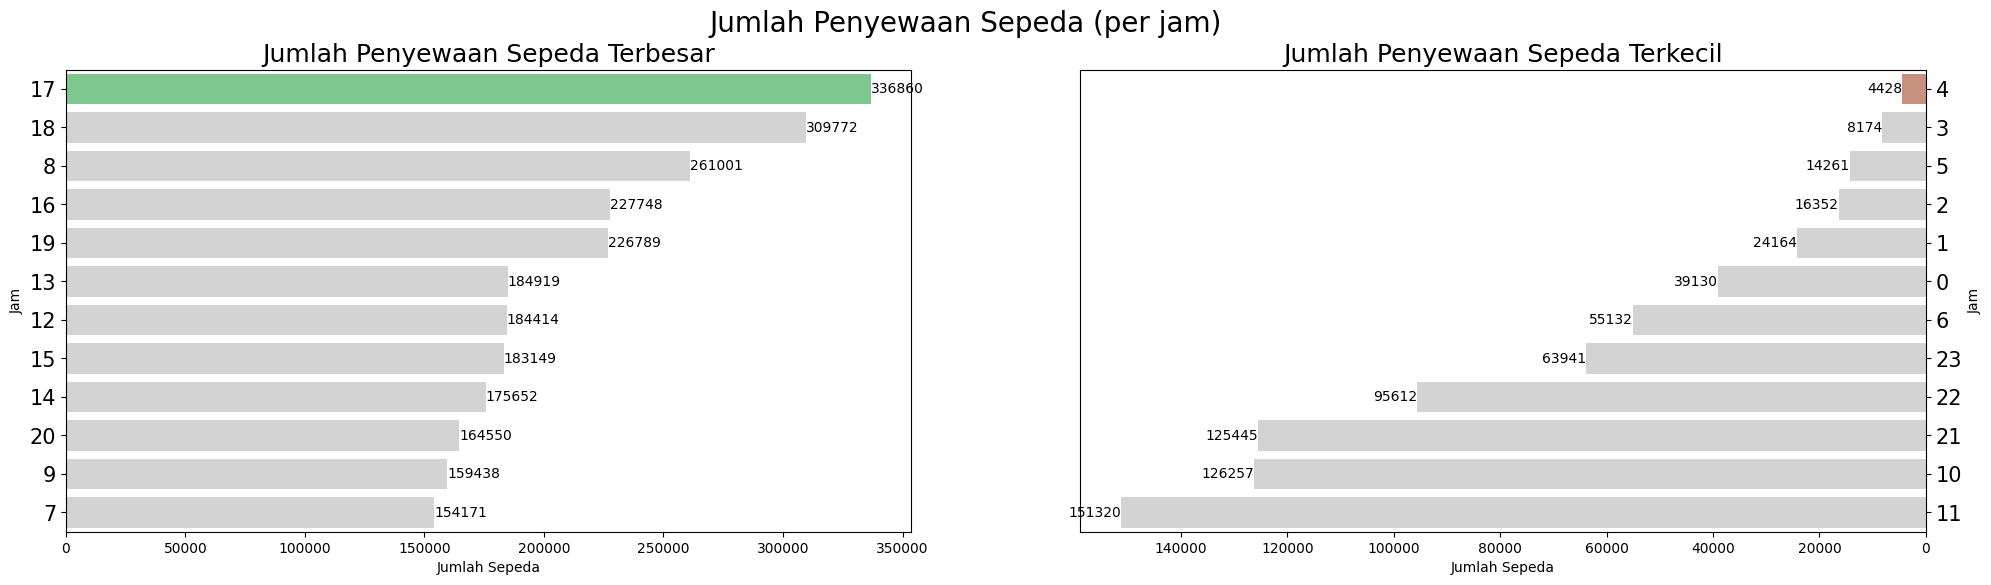

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define a function to create a color palette
def create_palette(df, column, highlight_high, highlight_low, neutral_color):
    palette = [neutral_color] * len(hours1_df)
    max_index = hours1_df[column].idxmax()
    min_index = hours1_df[column].idxmin()
    palette[max_index] = highlight_high
    palette[min_index] = highlight_low
    return palette

# Plot 1: Largest bike rentals
colors = create_palette(hours1_df.head(12), "cnt", "#72d48a","#D3D3D3", "#D3D3D3")
sns.barplot(x="cnt", y="hr", data=hours1_df.head(12), orient='h', palette=colors, ax=ax[0])
ax[0].set_ylabel("Jam")
ax[0].set_xlabel("Jumlah Sepeda")
ax[0].set_title("Jumlah Penyewaan Sepeda Terbesar", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Annotate the bars with their values
for i, v in enumerate(hours1_df.head(12)["cnt"]):
    ax[0].text(v + 2, i, f"{v}", color='black', va='center', fontsize=10)  # Adjust +2 for spacing

# Plot 2: Smallest bike rentals
sorted_df = hours1_df.sort_values(by="cnt", ascending=True).head(12)
colors1 = create_palette(sorted_df, "cnt", "#d48a72", "#D3D3D3", "#D3D3D3")
sns.barplot(x="cnt", y="hr", data=hours1_df.sort_values(by="cnt", ascending=True).head(12), orient='h', palette=colors1, ax=ax[1])
ax[1].set_ylabel("Jam")
ax[1].set_xlabel("Jumlah Sepeda")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jumlah Penyewaan Sepeda Terkecil", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

# Annotate the bars with their values
for i, v in enumerate(hours1_df.sort_values(by="cnt", ascending=True).head(12)["cnt"]):
    ax[1].text(v - 2, i, f"{v}", color='black', va='center', fontsize=10, ha='right')  # Adjust -2 for spacing

plt.suptitle("Jumlah Penyewaan Sepeda (per jam)", fontsize=20)
plt.show()

Berdasarkan grafik di atas, dapat dilihat penyewaan sepeda terbanyak oleh pelanggan adalah pada jam 17.00 atau jam 5 sore, sedangkan penyewaan sepeda paling sedikit pleh pelanggan adalah pada pukul 4 pagi.

In [37]:
day1_df = day_df.groupby("weekday").cnt.sum().reset_index()
day1_df["weekday"] = day1_df["weekday"].replace({0: 'Sunday',
                                             1: 'Monday',
                                             2: 'Tuesday',
                                             3: 'Wednesday',
                                             4: 'Thursday',
                                             5: 'Friday',
                                             6: 'Saturday'})
day1_df["weekday"] = day1_df['weekday'].astype('str')
day1_df

,weekday,cnt
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


<ipython-input-38-bf528494cf87>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weekday", y="cnt", data=day1_df, orient='v', palette=colors, ax=ax)


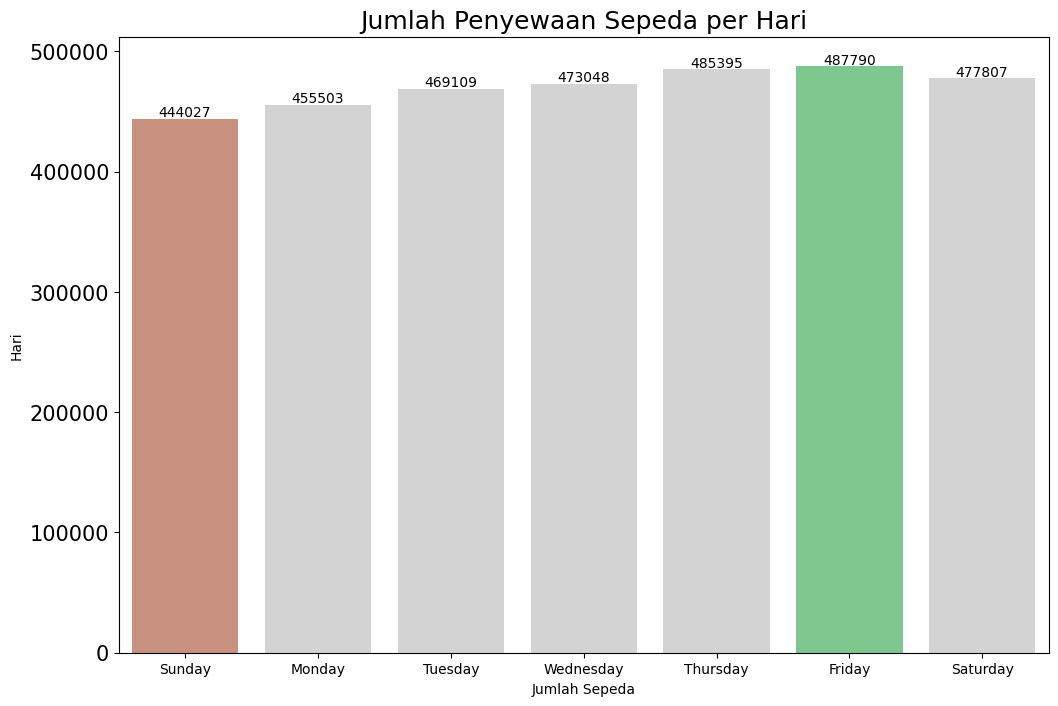

In [38]:
# Define a function to create a color palette
def create_palette(df, column, highlight_high, highlight_low, neutral_color):
    palette = [neutral_color] * len(day1_df)
    max_index = day1_df[column].idxmax()
    min_index = day1_df[column].idxmin()
    palette[max_index] = highlight_high
    palette[min_index] = highlight_low
    return palette

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# Plot 1: Largest bike rentals
colors = create_palette(day1_df, "cnt","#72d48a","#d48a72", "#D3D3D3")
sns.barplot(x="weekday", y="cnt", data=day1_df, orient='v', palette=colors, ax=ax)
ax.set_ylabel("Hari")
ax.set_xlabel("Jumlah Sepeda")
ax.set_title("Jumlah Penyewaan Sepeda per Hari", loc="center", fontsize=18)
ax.tick_params(axis='y', labelsize=15)

# Annotate the bars with their values
for i, v in enumerate(day1_df["cnt"]):
    ax.text(i-0.2, v + 5000, f"{v}", color='black', va='center', fontsize=10)  # Adjust +2 for spacing

plt.show()

Berdasarkan grafik, penyewaan sepeda paling banyak dilakukan pada hari Jumat, sedangkan penyewaan sepeda paling sedikit pleh pelanggan adalah pada hari Minggu. Meskipun begitu, terlihat bahwa perbedaan dari jumlah penyewaan sepeda tiap hari selama dua tahun tidak terlalu sigifikan.

### Pertanyaan 3: Bagaimana rata-rata persebaran pelanggan yang menyewa sepeda berdasarkan musim dan kondisi cuaca selama dua tahun tersebut ?

In [39]:
day_season1 = pd.DataFrame(day_df.groupby(by="season").cnt.mean().round().astype(int).reset_index())
day_season1["season"] = day_season1["season"].replace({1: 'Winter',
                                             2: 'Spring',
                                             3: 'Summer',
                                             4: 'Fall'})
day_season1

,season,cnt
0,Winter,2604
1,Spring,4992
2,Summer,5644
3,Fall,4728


<ipython-input-40-88a13a20d330>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_season1, orient='v', palette=colors_, ax=ax)


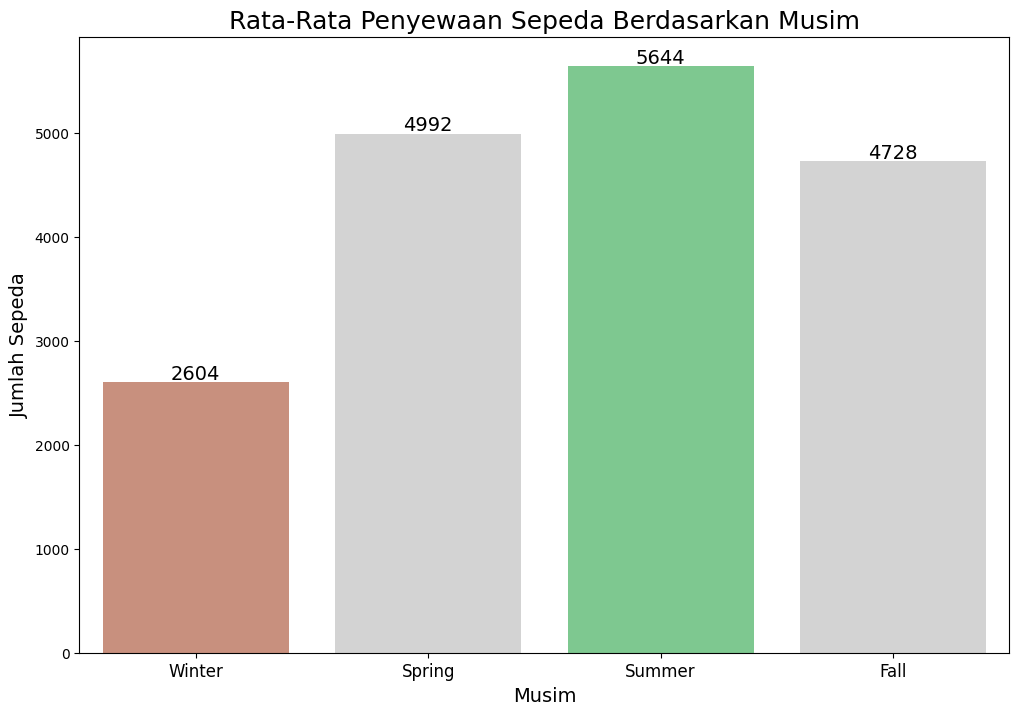

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))  # Adjust figsize for vertical plot

# Define a function to create a color palette
def create_palette(df, column, highlight_high, highlight_low, neutral_color):
    palette = [neutral_color] * len(day_season1)
    max_index = day_season1[column].idxmax()
    min_index = day_season1[column].idxmin()
    palette[max_index] = highlight_high
    palette[min_index] = highlight_low
    return palette

# Plot 1: Largest bike rentals (Vertical bar plot)
colors_ = create_palette(day_season1, "cnt","#72d48a","#d48a72", "#D3D3D3")
sns.barplot(x="season", y="cnt", data=day_season1, orient='v', palette=colors_, ax=ax)
ax.set_xlabel("Musim", fontsize=14)
ax.set_ylabel("Rata-rata penyewaan sepeda", fontsize=14)
ax.set_title("Rata-Rata Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=12)

# Annotate the bars with their values
for i, v in enumerate(day_season1["cnt"]):
    ax.text(i, v + 30, f"{v}", color='black', ha='center', fontsize=14)  # Adjust +2 for spacing above bars

plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan rata-rata banyak yang menyewa sepeda ketika musim panas (summer) dan sedikit yang menyewa sepeda ketika musim dingin (winter).

In [41]:
day_weatsit1 = pd.DataFrame(day_df.groupby(by="weathersit").cnt.mean().round().astype(int).reset_index())
day_weatsit1["weathersit"] = day_weatsit1["weathersit"].replace({1: 'Weather 1',
                                             2: 'Weather 2',
                                             3: 'Weather 3'})
day_weatsit1

,weathersit,cnt
0,Weather 1,4877
1,Weather 2,4036
2,Weather 3,1803


In [46]:
len(day_weatsit1)

3

<ipython-input-47-800b6aa73e3b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_weatsit1, orient='v', palette=colors_1, ax=ax)


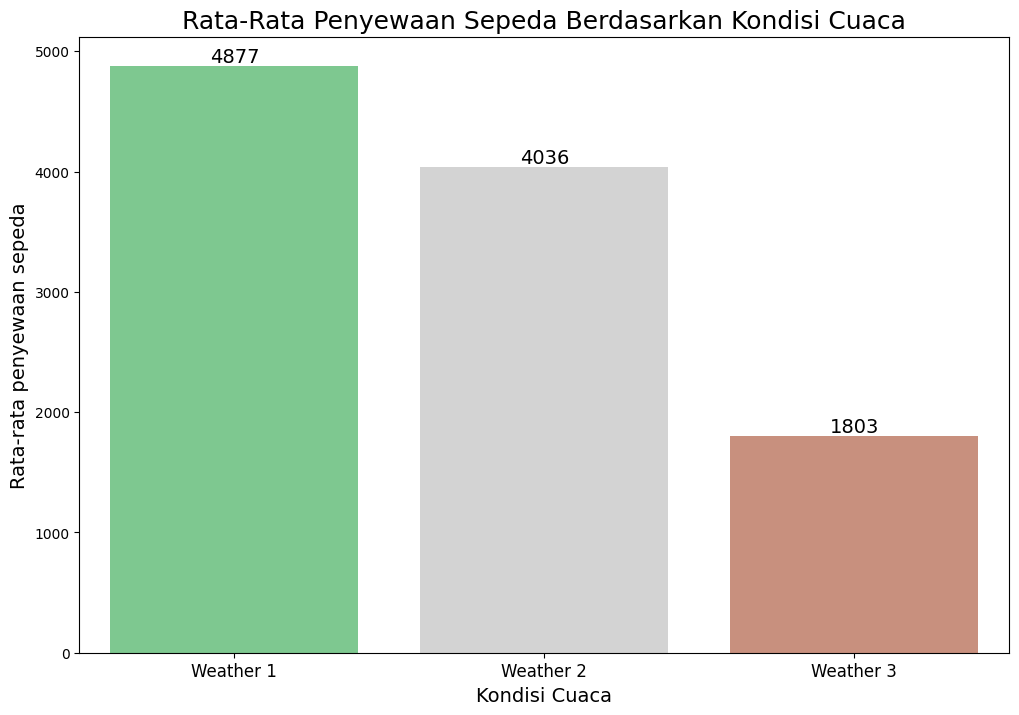

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))  # Adjust figsize for vertical plot

# Define a function to create a color palette
def create_palette(df, column, highlight_high, highlight_low, neutral_color):
    palette = [neutral_color] * len(day_weatsit1)
    max_index = day_weatsit1[column].idxmax()
    min_index = day_weatsit1[column].idxmin()
    palette[max_index] = highlight_high
    palette[min_index] = highlight_low
    return palette

# Plot 1: Largest bike rentals (Vertical bar plot)
colors_1 = create_palette(day_weatsit1, "cnt","#72d48a","#d48a72", "#D3D3D3")
sns.barplot(x="weathersit", y="cnt", data=day_weatsit1, orient='v', palette=colors_1, ax=ax)
ax.set_xlabel("Kondisi Cuaca", fontsize=14)
ax.set_ylabel("Rata-rata penyewaan sepeda", fontsize=14)
ax.set_title("Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=12)

# Annotate the bars with their values
for i, v in enumerate(day_weatsit1["cnt"]):
    ax.text(i, v + 30, f"{v}", color='black', ha='center', fontsize=14)  # Adjust +2 for spacing above bars

plt.show()

Perhatikan pada kolom weathersit, disitu tertulis dalam angka (int). Angka tersebut merepresentasikan masing-masing keadaan cuaca berikut ini:

1.  Clear, Few clouds, Partly cloudy
2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

## Conclusion

- Berdasarkan gambar pada output dari pertanyaan 1 di atas, dapat diambil kesimpulan bahwa terdapat kenaikan yang signifikan dari bisnis penyewaan sepeda dari tahun 2011 ke tahun 2012, dan bisa dilihat juga dari kedua tahun tersebut terdapat kesamaan yaitu penyewaan sepeda mengalami kenaikan pada 4 bulan pertama dan mengalami penurunan pada 4 bulan terakhir. Hal ini bisa dipengaruhi oleh beberapa faktor, salah satunya adalah faktor perubahan musim yang mana musim selalu berganti setiap triwulan sekali.
- Berdasarkan gambar pada output dari pertanyaan 2 di atas, dapat diambil kesimpulan bahwa jumlah sepeda yang disewa paling banyak oleh pelanggan adalah pada pukul 17.00 (5 sore), sedangkan penyewaan sepeda paling sedikit oleh pelanggan adalah pada pukul 4 pagi. Berdasarkan grafik juga, Berdasarkan grafik juga, penyewaan sepeda paling banyak dilakukan pada hari Jumat, sedangkan penyewaan sepeda paling sedikit pleh pelanggan adalah pada hari Minggu. Meskipun begitu, terlihat bahwa perbedaan dari jumlah penyewaan sepeda tiap hari selama dua tahun tidak terlalu sigifikan.
-Berdasarkan gambar pada output dari pertanyaan 3 di atas, diketahui bahwa kebanyakan pelanggan paling banyak suka menyewa sepeda ketika musim panas (fall) dan jumlah paling sedikit sepeda yang disewa ketika musim dingin (winter). Untuk jumlah sepeda yang dipesan berdasarkan kondisi cuaca, penyewaan sepeda paling banyak dilakukan pada kondisi cuaca pertama, yaitu: Cerah, Sedikit awan, Berawan sebagian. Sedangkan penyewaan sepeda paling sedikit ada pada kondisi cuaca 3, yaitu: Salju Ringan, Hujan Ringan + Badai Petir + Awan Berhamburan, Hujan Ringan + Awan Berhamburan.